In [1]:
%%capture
import keras
import keras.backend as K
import numpy as np
import pandas as pd
import matplotlib, os, math
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU
from keras.utils import np_utils
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.optimizers import SGD
from time import time
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from keras.callbacks import Callback
from IPython.display import display
os.environ["CUDA_VISIBLE_DEVICES"]="3"

### 1.Prepare data

In [2]:
from time import time
import numpy as np

start_time = time()

print('Loading X_train...')
X_train = np.load('/home/zxt/data/final_22/224/2k/X_train.npy')


end_time = time()
print('Running time: %s seconds'%(end_time - start_time))

Loading X_train...
Running time: 346.7868263721466 seconds


In [3]:
len(X_train)

35200

In [4]:
from time import time
import numpy as np

start_time = time()

print('Loading X_validate...')
X_validate = np.load('/home/zxt/data/final_22/224/2k/X_validate.npy')

print('Loading X_test...')
X_test = np.load('/home/zxt/data/final_22/224/2k/X_test.npy')

print('Loading labels...')
Y_train = np.load('/home/zxt/data/final_22/224/2k/Y_train.npy')
Y_validate = np.load('/home/zxt/data/final_22/224/2k/Y_validate.npy')
Y_test = np.load('/home/zxt/data/final_22/224/2k/Y_test.npy')

end_time = time()
print('Running time: %s seconds'%(end_time - start_time))

Loading X_validate...
Loading X_test...
Loading labels...
Running time: 94.2662079334259 seconds


In [5]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_validate.shape[0], 'validate samples')
print(X_test.shape[0], 'test samples')

X_train shape: (35200, 224, 224, 3)
35200 train samples
4400 validate samples
4400 test samples


In [6]:
X_train /=255.
X_validate /=  255.
X_test /= 255.

In [7]:
Y_train = np.load('/home/zxt/data/final_22/224/2k/Y_train.npy')
Y_validate = np.load('/home/zxt/data/final_22/224/2k/Y_validate.npy')
Y_test = np.load('/home/zxt/data/final_22/224/2k/Y_test.npy')

In [8]:
Y_test

array([['guineafowl'],
       ['lion'],
       ['wildebeest'],
       ...,
       ['buffalo'],
       ['hare'],
       ['black_bear']], dtype='<U16')

In [9]:
# Y_train label
for i in Y_train:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='coyote':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20
    if i[0]=='empty':
        i[0]=21
        
for i in Y_validate:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='coyote':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20
    if i[0]=='empty':
        i[0]=21

for i in Y_test:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='coyote':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20
    if i[0]=='empty':
        i[0]=21

In [10]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(Y_train,22)
y_valid=np_utils.to_categorical(Y_validate,22)
y_test=np_utils.to_categorical(Y_test,22)

In [11]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

### 2.Model structure

In [12]:
def alexnet_s(input_shape, n_classes):
    input = Input(input_shape)
  
    # actually batch normalization didn't exist back then
    # they used LRN (Local Response Normalization) for regularization
    x = Conv2D(96, 11, strides=4, padding='same', activation='relu')(input)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)
  
    x = Conv2D(256, 5, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)
  
    x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)
  
    x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)
  
    x = Conv2D(256, 3, strides=1, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)
  
    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)
    
    # S: add two more layers to train
    x = Dropout(0.4)(x)
    x = Dense(4096,activation='relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(4096,activation='relu')(x)
    
  
    output = Dense(n_classes, activation='softmax')(x)
  
    model = Model(input, output)
    return model

In [13]:
# prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

### 3.Modeling

In [14]:
num_train_samples = len(Y_train)
num_val_samples = len(Y_validate)
batch_size = 128
epochs = 30
n_classes = 22
input_shape = 224,224,3

learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [15]:
K.clear_session()
model = alexnet_s(input_shape, n_classes)
# model.summary()

In [16]:
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [17]:
start_time = time()
print('Training model...')


hist = model.fit(
    X_train, 
    y_train,
    batch_size=batch_size,
    epochs=epochs,
#     callbacks=[early_stopping],
    validation_data = (X_validate,y_valid))

end_time = time()
print('Running time: %s seconds'%(end_time - start_time))

Training model...
Train on 35200 samples, validate on 4400 samples
Epoch 1/30
35200/35200 [==============================] - 184s 5ms/step - loss: 1.9276 - accuracy: 0.3617 - val_loss: 1.8051 - val_accuracy: 0.4077
Epoch 2/30
35200/35200 [==============================] - 173s 5ms/step - loss: 1.3762 - accuracy: 0.5170 - val_loss: 1.4215 - val_accuracy: 0.5023
Epoch 3/30
35200/35200 [==============================] - 173s 5ms/step - loss: 1.1589 - accuracy: 0.5967 - val_loss: 1.1319 - val_accuracy: 0.6175
Epoch 4/30
35200/35200 [==============================] - 173s 5ms/step - loss: 1.0164 - accuracy: 0.6450 - val_loss: 1.2832 - val_accuracy: 0.5680
Epoch 5/30
35200/35200 [==============================] - 173s 5ms/step - loss: 0.8913 - accuracy: 0.6888 - val_loss: 0.9246 - val_accuracy: 0.6907
Epoch 6/30
35200/35200 [==============================] - 173s 5ms/step - loss: 0.7882 - accuracy: 0.7246 - val_loss: 0.9018 - val_accuracy: 0.6989
Epoch 7/30
35200/35200 [=====================

In [19]:
model.save('/home/zxt/data/final_22/model/224_2k/alexnet_s_30epoch.h5')
model.save_weights('/home/zxt/data/final_22/model/224_2k/alexnet_s_30epoch_weights.h5')

### 4.Evaluation

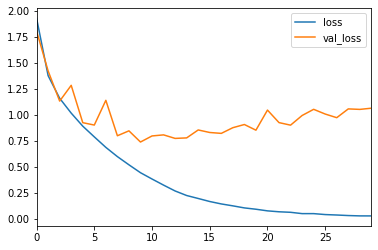

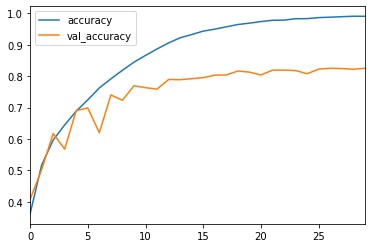

In [21]:
history_df = pd.DataFrame(hist.history)
history_df[['loss', 'val_loss']].plot()
history_df[['accuracy', 'val_accuracy']].plot()

### 5.Prediction on X_test dataset

In [22]:
loss,accuracy = model.evaluate(X_test,y_test)
print('\ntest loss',loss)
print('accuracy',accuracy)

4400/4400 [==============================] - 13s 3ms/step

test loss 1.0215469255095178
accuracy 0.822954535484314


In [23]:
y_pred = model.predict(X_test,batch_size=1)

In [24]:
y_pred

array([[4.3376565e-16, 1.5084010e-20, 3.6485742e-11, ..., 1.6784633e-24,
        1.4200040e-20, 6.3928626e-16],
       [1.5171839e-09, 1.7734868e-13, 9.8311432e-07, ..., 3.8371045e-13,
        7.6457953e-13, 9.3227016e-11],
       [1.4368746e-07, 4.5773136e-16, 1.5108137e-10, ..., 4.0014549e-19,
        2.8742157e-17, 6.4205775e-13],
       ...,
       [2.8194419e-01, 2.8589835e-07, 6.8550982e-08, ..., 8.7515765e-11,
        2.4836342e-09, 1.0654555e-06],
       [6.1530967e-16, 7.2726188e-14, 5.1848821e-14, ..., 4.5552884e-08,
        4.6151069e-12, 4.1589846e-14],
       [1.4429199e-09, 3.3852473e-04, 4.5949881e-15, ..., 9.7535163e-02,
        6.4672291e-15, 3.3090477e-14]], dtype=float32)

In [25]:
len(y_pred)

4400

### 6.Check each category recall

In [26]:
a = list(y_pred)
y_prediction=[]
for i in a:
    j =list(i)
    y_prediction.append(j.index(max(j)))

In [27]:
y_prediction[:5]

[5, 17, 14, 7, 7]

In [28]:
Y_test[:5]

array([['5'],
       ['17'],
       ['14'],
       ['7'],
       ['7']], dtype='<U16')

In [29]:
# array to dataframe
y_real=pd.DataFrame(Y_test,columns=['label'])

In [30]:
y_predict = pd.DataFrame(y_prediction,columns=['label_pre'])

In [31]:
prediction_df = pd.concat([y_real,y_predict],axis=1)
prediction_df['label']=prediction_df['label'].astype(int)
prediction_df['diff']=prediction_df['label']-prediction_df['label_pre']


In [32]:
prediction_df

,label,label_pre,diff
0,5,5,0
1,17,17,0
2,14,14,0
3,7,7,0
4,7,7,0
...,...,...,...
4395,1,1,0
4396,12,12,0
4397,11,11,0
4398,12,12,0


In [33]:
prediction_df.to_csv(r'/home/zxt/data/final_22/prediction/alexnet_s_predictdiff.csv',index=False)

In [38]:
onehot_keylist = ['elephant','wild_boar','gazellethomosons','squirrel','hedgehog','guineafowl','moose','coyote','bird',
                  'fox','giraffe','buffalo','hare','vehicle','wildebeest','cattle','skunk','lion','zebra','black_bear',
                  'racoon','empty']
onehot_dict = {'elephant':0,'wild_boar':1,'gazellethomosons':2,'squirrel':3,'hedgehog':4,'guineafowl':5,'moose':6,'coyote':7,
              'bird':8,'fox':9,'giraffe':10,'buffalo':11,'hare':12,'vehicle':13,'wildebeest':14,'cattle':15,'skunk':16,'lion':17,
              'zebra':18,'black_bear':19,'racoon':20,'empty':21}

for animal in onehot_keylist:
    name = animal
    animal = prediction_df[prediction_df['label']== onehot_dict[animal]]
    acc = animal.loc[:,'diff'].value_counts()[0]/len(animal)
    print("%s recall: %10.3f" %(name,acc) )

elephant recall:      0.731
wild_boar recall:      0.746
gazellethomosons recall:      0.800
squirrel recall:      0.848
hedgehog recall:      0.990
guineafowl recall:      0.922
moose recall:      0.968
coyote recall:      0.809
bird recall:      0.791
fox recall:      0.825
giraffe recall:      0.917
buffalo recall:      0.788
hare recall:      0.982
vehicle recall:      0.904
wildebeest recall:      0.667
cattle recall:      0.680
skunk recall:      0.867
lion recall:      0.678
zebra recall:      0.682
black_bear recall:      0.800
racoon recall:      0.912
empty recall:      0.776


### 7.Confusion Matrix

In [35]:
animal_label_dict = {0:'elephant',1:'wild_boar',2:'gazellethomosons',3:'squirrel',4:'hedgehog',
                    5:'guineafowl',6:'moose',7:'coyote',8:'bird',9:'fox',10:'giraffe',
                    11:'buffalo',12:'hare',13:'vehicle',14:'wildebeest',15:'cattle',
                    16:'skunk',17:'lion',18:'zebra',19:'black_bear',20:'racoon',21:'empty'}     
labels=[]
for i in range(0,22):
    name = animal_label_dict[i]
    labels.append(name)

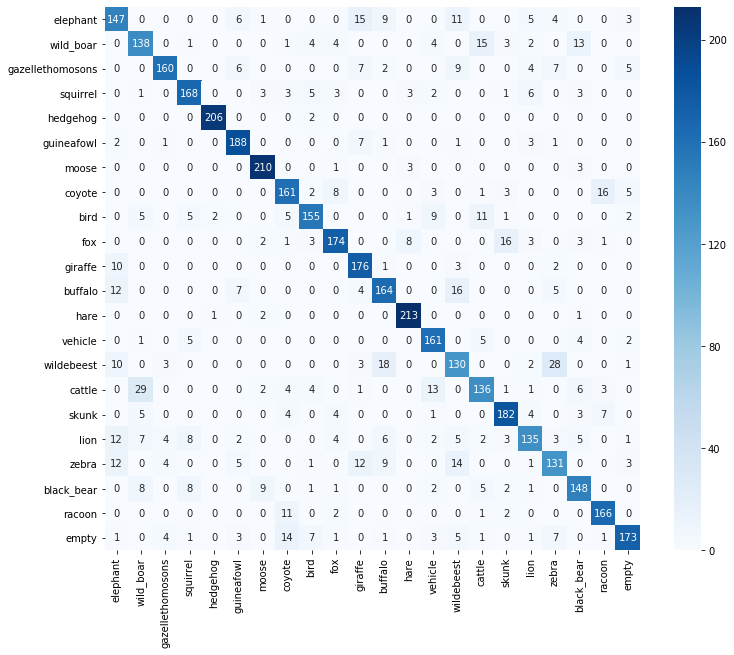

In [36]:
%matplotlib inline
C2=confusion_matrix(prediction_df['label'],prediction_df['label_pre'], labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
plt.figure(figsize=(12,10))
sns.heatmap(C2,annot=True,cmap="Blues",xticklabels=labels,yticklabels=labels,fmt='.20g')

### 8.Precision, recall, f1 score

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(classification_report(prediction_df['label'],prediction_df['label_pre']))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       201
           1       0.71      0.75      0.73       185
           2       0.91      0.80      0.85       200
           3       0.86      0.85      0.85       198
           4       0.99      0.99      0.99       208
           5       0.87      0.92      0.89       204
           6       0.92      0.97      0.94       217
           7       0.79      0.81      0.80       199
           8       0.84      0.79      0.82       196
           9       0.86      0.82      0.84       211
          10       0.78      0.92      0.84       192
          11       0.78      0.79      0.78       208
          12       0.93      0.98      0.96       217
          13       0.81      0.90      0.85       178
          14       0.67      0.67      0.67       195
          15       0.77      0.68      0.72       200
          16       0.85      0.87      0.86       210
          17       0.80    